In [10]:
!uv add matplotlib

Resolved 123 packages in 388ms                                       
Prepared 7 packages in 416ms                                             
Installed 7 packages in 17ms                                
 + contourpy==1.3.3
 + cycler==0.12.1
 + fonttools==4.61.1
 + kiwisolver==1.4.9
 + matplotlib==3.10.8
 + pillow==12.1.0
 + pyparsing==3.3.1


In [11]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

df = pd.read_parquet(
    "gs://sec-financials-edgar/edgar_idx_files/dataframes/company_index.parquet",
    engine="pyarrow"
)

df.head()

,Company Name,Form Type,CIK,Date Filed,Filename,Year,Quarter,SourceFile
0,MERRILL LYNCH LIFE VARIABLE ANNUITY SEPARATE A...,NSAR-B,880794,1993-02-26,edgar/data/880794/9999999997-05-050433.txt,1993,QTR1,1993_QTR1_company.idx
1,RBS PARTNERS L P /CT,13FCONP,860585,1993-02-11,edgar/data/860585/9999999997-04-035713.txt,1993,QTR1,1993_QTR1_company.idx
2,SMITH THOMAS W,13F-HR,926688,1993-02-12,edgar/data/926688/9999999997-05-015654.txt,1993,QTR1,1993_QTR1_company.idx
3,STORAGE TECHNOLOGY CORP,CERTNYS,94673,1993-02-24,edgar/data/94673/9999999997-05-037760.txt,1993,QTR1,1993_QTR1_company.idx
4,RBS PARTNERS L P /CT,13FCONP,860585,1993-05-12,edgar/data/860585/9999999997-04-042068.txt,1993,QTR2,1993_QTR2_company.idx


In [2]:
#Data Cleaning to remove filings with no dates
# Remove rows where 'Date Filed' contains '------------'
df = df[df['Date Filed'] != '------------']

In [3]:
df.head()

,Company Name,Form Type,CIK,Date Filed,Filename,Year,Quarter,SourceFile
0,MERRILL LYNCH LIFE VARIABLE ANNUITY SEPARATE A...,NSAR-B,880794,1993-02-26,edgar/data/880794/9999999997-05-050433.txt,1993,QTR1,1993_QTR1_company.idx
1,RBS PARTNERS L P /CT,13FCONP,860585,1993-02-11,edgar/data/860585/9999999997-04-035713.txt,1993,QTR1,1993_QTR1_company.idx
2,SMITH THOMAS W,13F-HR,926688,1993-02-12,edgar/data/926688/9999999997-05-015654.txt,1993,QTR1,1993_QTR1_company.idx
3,STORAGE TECHNOLOGY CORP,CERTNYS,94673,1993-02-24,edgar/data/94673/9999999997-05-037760.txt,1993,QTR1,1993_QTR1_company.idx
4,RBS PARTNERS L P /CT,13FCONP,860585,1993-05-12,edgar/data/860585/9999999997-04-042068.txt,1993,QTR2,1993_QTR2_company.idx


In [4]:
# Convert 'Date Filed' to datetime if it's not already
df['Date Filed'] = pd.to_datetime(df['Date Filed'])

# Extract month and year from 'Date Filed'
df['Month'] = df['Date Filed'].dt.month
df['Year'] = df['Date Filed'].dt.year
df.head()

,Company Name,Form Type,CIK,Date Filed,Filename,Year,Quarter,SourceFile,Month
0,MERRILL LYNCH LIFE VARIABLE ANNUITY SEPARATE A...,NSAR-B,880794,1993-02-26,edgar/data/880794/9999999997-05-050433.txt,1993,QTR1,1993_QTR1_company.idx,2
1,RBS PARTNERS L P /CT,13FCONP,860585,1993-02-11,edgar/data/860585/9999999997-04-035713.txt,1993,QTR1,1993_QTR1_company.idx,2
2,SMITH THOMAS W,13F-HR,926688,1993-02-12,edgar/data/926688/9999999997-05-015654.txt,1993,QTR1,1993_QTR1_company.idx,2
3,STORAGE TECHNOLOGY CORP,CERTNYS,94673,1993-02-24,edgar/data/94673/9999999997-05-037760.txt,1993,QTR1,1993_QTR1_company.idx,2
4,RBS PARTNERS L P /CT,13FCONP,860585,1993-05-12,edgar/data/860585/9999999997-04-042068.txt,1993,QTR2,1993_QTR2_company.idx,5


In [7]:
#Creating a dictionary for month names and mapping them to create a new column
month_names = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
df['Month_Name'] = df['Month'].map(month_names)
df.head()

,Company Name,Form Type,CIK,Date Filed,Filename,Year,Quarter,SourceFile,Month,Month_Name
0,MERRILL LYNCH LIFE VARIABLE ANNUITY SEPARATE A...,NSAR-B,880794,1993-02-26,edgar/data/880794/9999999997-05-050433.txt,1993,QTR1,1993_QTR1_company.idx,2,Feb
1,RBS PARTNERS L P /CT,13FCONP,860585,1993-02-11,edgar/data/860585/9999999997-04-035713.txt,1993,QTR1,1993_QTR1_company.idx,2,Feb
2,SMITH THOMAS W,13F-HR,926688,1993-02-12,edgar/data/926688/9999999997-05-015654.txt,1993,QTR1,1993_QTR1_company.idx,2,Feb
3,STORAGE TECHNOLOGY CORP,CERTNYS,94673,1993-02-24,edgar/data/94673/9999999997-05-037760.txt,1993,QTR1,1993_QTR1_company.idx,2,Feb
4,RBS PARTNERS L P /CT,13FCONP,860585,1993-05-12,edgar/data/860585/9999999997-04-042068.txt,1993,QTR2,1993_QTR2_company.idx,5,May


In [5]:
df['Form Type'].describe()

count     23772174
unique         637
top              4
freq       9388082
Name: Form Type, dtype: object

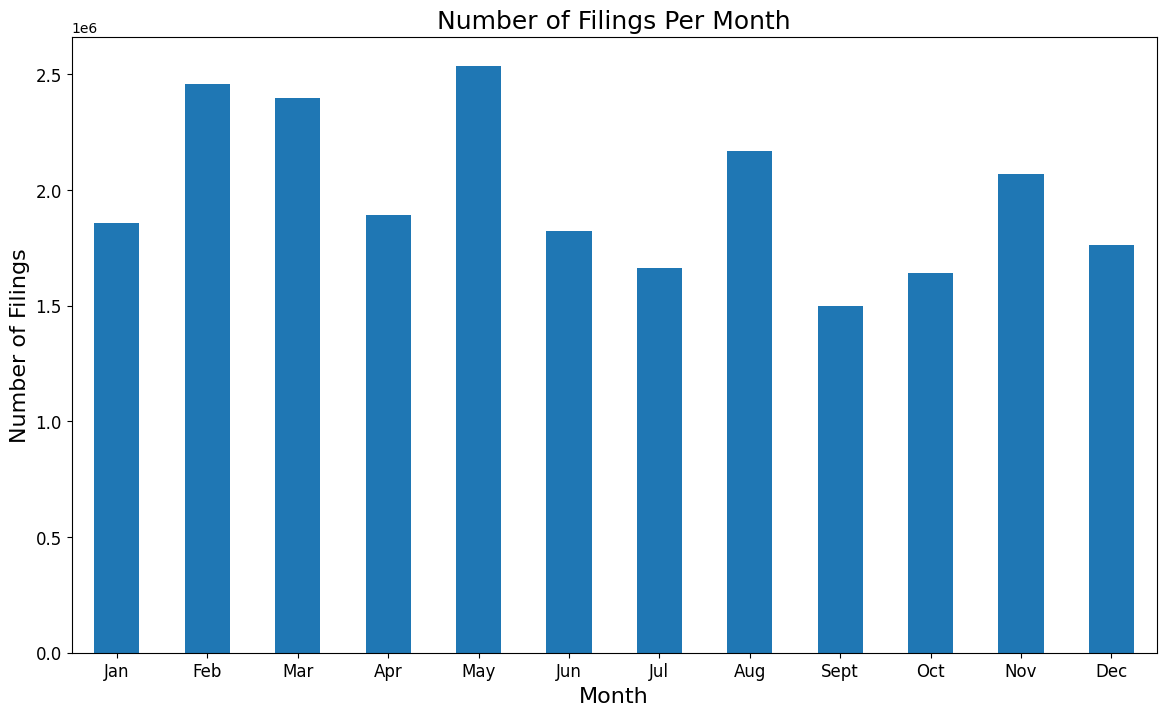

In [12]:
# Convert the 'Month_Name' column to a categorical type with a defined order
df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=month_names.values(), ordered=True)

# Count filings per month
monthly_filings = df.groupby('Month_Name', observed=True).size()

# Sort counts in ascending order(optional, you can remove this, if you want the months to be in sequence)
#monthly_filings_sorted = monthly_filings.sort_values()

# Plotting the results
plt.figure(figsize=(14, 8))
monthly_filings.plot(kind='bar')
plt.title('Number of Filings Per Month', fontsize = 18)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of Filings', fontsize = 16)
plt.xticks(rotation=0, fontsize = 12)
plt.yticks(rotation=0, fontsize = 12)
plt.show()

In [ ]:
import pandas as pd; df=pd.read_parquet('/Users/nareshchethala/Desktop/sec-edgar-pipeline/company_index_10k.parquet'); print(df.shape); print(df.columns.tolist()[:12]); print(df[['Form Type','Filename']].head())

: 

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

: 

In [16]:
import pandas as pd

path = "gs://sec-financials-edgar/edgar_10k_html/parts/part-000008.parquet"

df = pd.read_parquet(path)

df.head()

,status,filing_url,filing_text,cleaned_text,company_name,form_type,cik,date_filed,filename,year,quarter,sourcefile
0,✅ Success,https://www.sec.gov/Archives/edgar/data/15615/...,-----BEGIN PRIVACY-ENHANCED MESSAGE-----\nProc...,-----BEGIN PRIVACY-ENHANCED MESSAGE-----\nProc...,BURNUP & SIMS INC,10-K/A,15615,1994-02-08,edgar/data/15615/0000015615-94-000005.txt,1994,QTR1,1994_QTR1_company.idx
1,✅ Success,https://www.sec.gov/Archives/edgar/data/15840/...,-----BEGIN PRIVACY-ENHANCED MESSAGE-----\nProc...,-----BEGIN PRIVACY-ENHANCED MESSAGE-----\nProc...,BUTLER MANUFACTURING CO,10-K,15840,1994-03-25,edgar/data/15840/0000950124-94-000588.txt,1994,QTR1,1994_QTR1_company.idx
2,✅ Success,https://www.sec.gov/Archives/edgar/data/310433...,-----BEGIN PRIVACY-ENHANCED MESSAGE-----\nProc...,-----BEGIN PRIVACY-ENHANCED MESSAGE-----\nProc...,C TEC CORP,10-K,310433,1994-03-31,edgar/data/310433/0000310433-94-000006.txt,1994,QTR1,1994_QTR1_company.idx
3,✅ Success,https://www.sec.gov/Archives/edgar/data/763657...,-----BEGIN PRIVACY-ENHANCED MESSAGE-----\nProc...,-----BEGIN PRIVACY-ENHANCED MESSAGE-----\nProc...,CABLE TV FUND 12-A LTD,10-K,763657,1994-03-30,edgar/data/763657/0000950134-94-000306.txt,1994,QTR1,1994_QTR1_company.idx
4,✅ Success,https://www.sec.gov/Archives/edgar/data/782975...,-----BEGIN PRIVACY-ENHANCED MESSAGE-----\nProc...,-----BEGIN PRIVACY-ENHANCED MESSAGE-----\nProc...,CABLE TV FUND 12-C LTD,10-K,782975,1994-03-30,edgar/data/782975/0000950134-94-000305.txt,1994,QTR1,1994_QTR1_company.idx


In [17]:
print(df['filing_text'][5])

-----BEGIN PRIVACY-ENHANCED MESSAGE-----
Proc-Type: 2001,MIC-CLEAR
Originator-Name: keymaster@town.hall.org
Originator-Key-Asymmetric:
 MFkwCgYEVQgBAQICAgADSwAwSAJBALeWW4xDV4i7+b6+UyPn5RtObb1cJ7VkACDq
 pKb9/DClgTKIm08lCfoilvi9Wl4SODbR1+1waHhiGmeZO8OdgLUCAwEAAQ==
MIC-Info: RSA-MD5,RSA,
 SY0AwWzl2BiCytzNUp86b2esmcYxcKw54WPIDjjKs6jh8S6xgggsHWwqoZ6uK2wF
 haMiiw9sOsrPQVLi2ceExA==

<IMS-DOCUMENT>0000950134-94-000309.txt : 19940331
<IMS-HEADER>0000950134-94-000309.hdr.sgml : 19940331
ACCESSION NUMBER:		0000950134-94-000309
CONFORMED SUBMISSION TYPE:	10-K
PUBLIC DOCUMENT COUNT:		1
CONFORMED PERIOD OF REPORT:	19931231
FILED AS OF DATE:		19940330

FILER:

	COMPANY DATA:	
		COMPANY CONFORMED NAME:			CABLE TV FUND 12-D LTD
		CENTRAL INDEX KEY:			0000789292
		STANDARD INDUSTRIAL CLASSIFICATION:	4812
		IRS NUMBER:				841010423
		STATE OF INCORPORATION:			CO
		FISCAL YEAR END:			1231

	FILING VALUES:
		FORM TYPE:		10-K
		SEC ACT:		34
		SEC FILE NUMBER:	000-14206
		FILM NUMBER:		94519174

	BUSINESS AD

In [18]:
print(df["cleaned_text"][5])

-----BEGIN PRIVACY-ENHANCED MESSAGE-----
Proc-Type: 2001,MIC-CLEAR
Originator-Name: keymaster@town.hall.org
Originator-Key-Asymmetric:
MFkwCgYEVQgBAQICAgADSwAwSAJBALeWW4xDV4i7+b6+UyPn5RtObb1cJ7VkACDq
pKb9/DClgTKIm08lCfoilvi9Wl4SODbR1+1waHhiGmeZO8OdgLUCAwEAAQ==
MIC-Info: RSA-MD5,RSA,
SY0AwWzl2BiCytzNUp86b2esmcYxcKw54WPIDjjKs6jh8S6xgggsHWwqoZ6uK2wF
haMiiw9sOsrPQVLi2ceExA==
0000950134-94-000309.txt : 19940331
0000950134-94-000309.hdr.sgml : 19940331
ACCESSION NUMBER:		0000950134-94-000309
CONFORMED SUBMISSION TYPE:	10-K
PUBLIC DOCUMENT COUNT:		1
CONFORMED PERIOD OF REPORT:	19931231
FILED AS OF DATE:		19940330
FILER:
COMPANY DATA:
COMPANY CONFORMED NAME:			CABLE TV FUND 12-D LTD
CENTRAL INDEX KEY:			0000789292
STANDARD INDUSTRIAL CLASSIFICATION:	4812
IRS NUMBER:				841010423
STATE OF INCORPORATION:			CO
FISCAL YEAR END:			1231
FILING VALUES:
FORM TYPE:		10-K
SEC ACT:		34
SEC FILE NUMBER:	000-14206
FILM NUMBER:		94519174
BUSINESS ADDRESS:
STREET 1:		9697 E MINERAL AVE
STREET 2:		PO BOX 3309

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status        25 non-null     object
 1   filing_url    25 non-null     object
 2   filing_text   25 non-null     object
 3   cleaned_text  25 non-null     object
 4   company_name  25 non-null     object
 5   form_type     25 non-null     object
 6   cik           25 non-null     object
 7   date_filed    25 non-null     object
 8   filename      25 non-null     object
 9   year          25 non-null     int32 
 10  quarter       25 non-null     object
 11  sourcefile    25 non-null     object
dtypes: int32(1), object(11)
memory usage: 2.4+ KB
